In [1]:
%matplotlib inline

In [2]:
import lightkurve as lk
from dt_lightcurve import DeepTransit, plot_lc_with_bboxes

In [3]:
search_result = lk.search_lightcurve('KIC 8692861', author='Kepler', quarter=14)

In [4]:
lc = search_result.download_all().stitch()

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

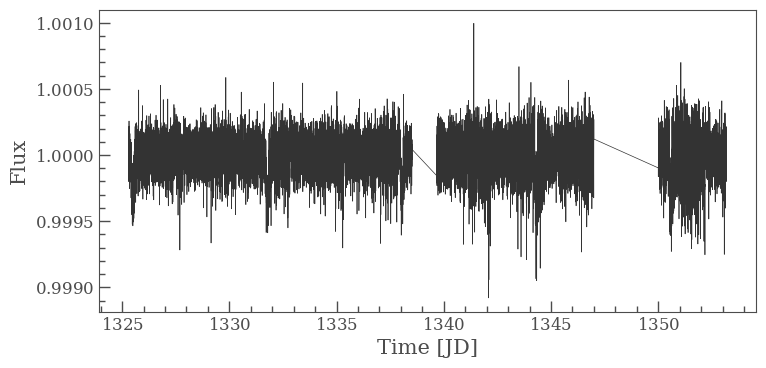

In [22]:
lc.plot()

In [20]:
dt = DeepTransit(lc)

KeyError: 'NORMALIZED'

In [7]:
bboxes = dt.transit_detection()

=> Loading checkpoint


100%|██████████| 12/12 [00:05<00:00,  2.35it/s]


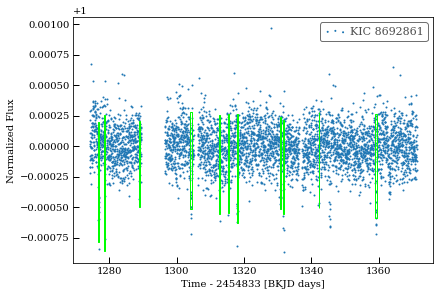

In [8]:
plot_lc_with_bboxes(lc, bboxes)

In [9]:
import pandas as pd

In [11]:
data = pd.read_csv('../../1809.05967/pimensatesslightcurve.csv')

In [18]:
lc = lk.LightCurve(data.time, data.flux)

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

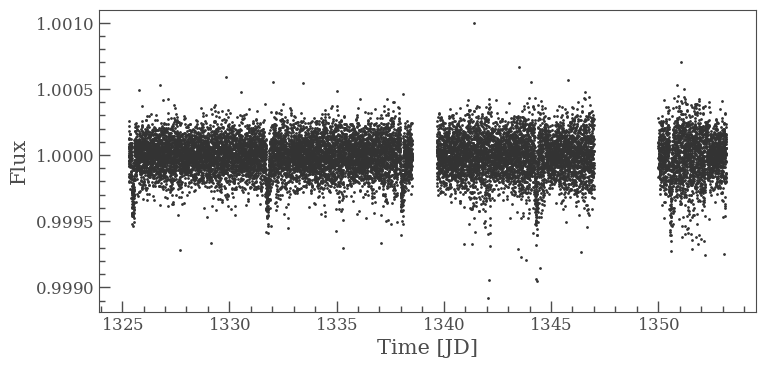

In [19]:
lc.scatter()

In [25]:
import numpy as np

In [26]:
t = lc.time.value[0]
sub_sample_time = []
sub_sample_flux = []
while t <= lc.time.value[-1]:
    sub_lc = lc[(lc.time.value>t)&(lc.time.value<t+0.0204)]
    sub_sample_time.append(t + 0.0204/2)
    sub_sample_flux.append(np.nanmean(sub_lc.flux.value))
    t += 0.0204

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

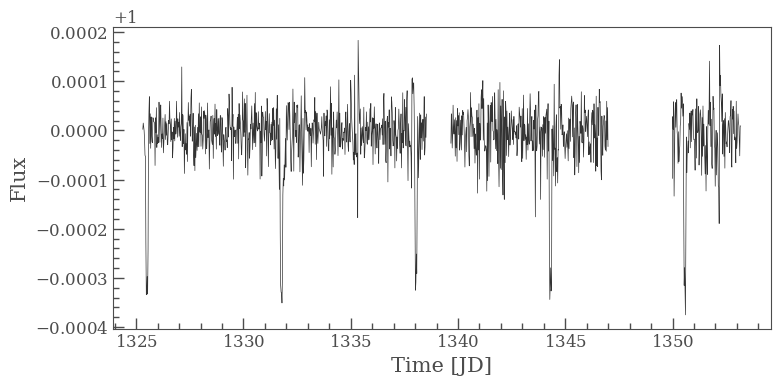

In [28]:
lk.LightCurve(time=sub_sample_time, flux=sub_sample_flux).plot()